In [1]:
import sys
sys.path.append('..')

import numpy as np

In [5]:
outputdir = '/group/jug/ashesh/indiSplitResults/time_prediction'
indi_unattainable_norm = np.load('/group/jug/ashesh/indiSplitResults/time_prediction/time_prediction_diffsplit_2502_Hagen-UnetClassifier-l2_13_ClassicNormalization-True.npy', allow_pickle=True)[()]
indi_correct_norm = np.load('/group/jug/ashesh/indiSplitResults/time_prediction/time_prediction_diffsplit_2502_Hagen-UnetClassifier-l2_13_ClassicNormalization-False.npy', allow_pickle=True)[()]
indisplit_correct_norm = np.load('/group/jug/ashesh/indiSplitResults/time_prediction/time_prediction_diffsplit_2502_Hagen-UnetClassifier-l2_11_ClassicNormalization-False.npy', allow_pickle=True)[()]
indisplit_correct_norm.keys()

dict_keys(['gt', 'avg_pred', 'err_pred', 'mse'])

/tmp/ipykernel_44203/3957431105.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(indi_unattainable_norm['gt'],indi_unattainable_norm['gt'], 'k--', color='black')


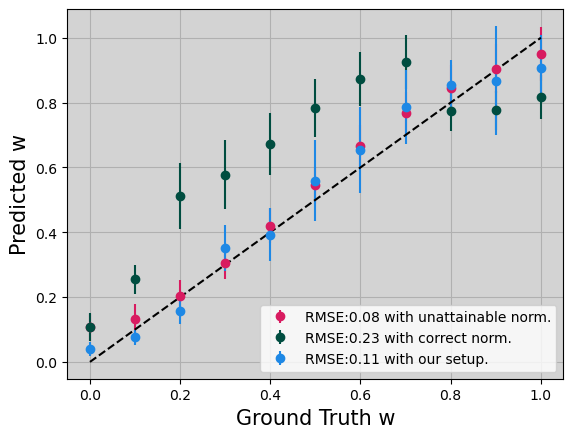

In [7]:
import matplotlib.pyplot as plt

_,ax  = plt.subplots()
# plot with error bars
rmse_unattainable_norm = np.sqrt(indi_unattainable_norm['mse'].mean())
ax.errorbar(indi_unattainable_norm['gt'], indi_unattainable_norm['avg_pred'], yerr=indi_unattainable_norm['err_pred'], fmt='o', label=f'RMSE:{rmse_unattainable_norm:.2f} with unattainable norm.',
            color='#D81B60')
rmse_correct_norm = np.sqrt(indi_correct_norm['mse'].mean())
ax.errorbar(indi_correct_norm['gt'], indi_correct_norm['avg_pred'], yerr=indi_correct_norm['err_pred'], fmt='o', label=f'RMSE:{rmse_correct_norm:.2f} with correct norm.',
            color='#004D40')

rmse_our_norm = np.sqrt(indisplit_correct_norm['mse'].mean())
ax.errorbar(indisplit_correct_norm['gt'], indisplit_correct_norm['avg_pred'], yerr=indisplit_correct_norm['err_pred'], fmt='o', label=f'RMSE:{rmse_our_norm:.2f} with our setup.',
            color='#1E88E5')

ax.plot(indi_unattainable_norm['gt'],indi_unattainable_norm['gt'], 'k--', color='black')
ax.set_xlabel('Ground Truth w', fontsize=15)
ax.set_ylabel('Predicted w', fontsize=15)
# facecolor to gray
ax.set_facecolor('lightgray')
plt.legend()
ax.grid()

plt.savefig(f"{outputdir}/normalization_justification_hagen.png", 
            dpi=250,bbox_inches='tight')